In [ ]:
from tensorflow import keras

In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten

In [ ]:
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/chest_xray/train'
valid_path = '/content/drive/MyDrive/chest_xray/test'

In [ ]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
for layer in vgg.layers:
    layer.trainable = False

In [ ]:
folders = glob('/content/drive/MyDrive/chest_xray/train')
x = Flatten()(vgg.output)

In [ ]:

num_classes = 1
prediction = Dense(num_classes, activation='sigmoid')(x)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)
# view the structure of the model
model.summary()

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │        25,089 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,739,777 (56.23 MB)

 Trainable params: 25,089 (98.00 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
model.compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True
                                   )

test_datagen = ImageDataGenerator(rescale = 1./255
                                   )




# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/chest_xray/train',
                                                 target_size = (224, 224),
                                                 batch_size = 10,
                                                 class_mode ='binary',
                                                  )




test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/chest_xray/test',
                                            target_size = (224, 224),
                                            batch_size = 10,
                                            class_mode ='binary'

                                             )

Found 2129 images belonging to 2 classes.
Found 654 images belonging to 2 classes.


In [ ]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True


In [ ]:
import tensorflow as tf

# Define callbacks to save model and log training
checkpoint = tf.keras.callbacks.ModelCheckpoint(
    "pneumonic_detection_m0del.h5", monitor='val_loss', save_best_only=True
)
csv_logger = tf.keras.callbacks.CSVLogger('training_log.csv', append=True)

# Train your model with callbacks
history = model.fit(
    training_set,
    validation_data=test_set,
    epochs=10,
    callbacks=[checkpoint, csv_logger]
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8647 - loss: 0.3104

213/213 ━━━━━━━━━━━━━━━━━━━━ 1022s 5s/step - accuracy: 0.8650 - loss: 0.3099 - val_accuracy: 0.8333 - val_loss: 0.3480
Epoch 2/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step - accuracy: 0.9568 - loss: 0.1096

213/213 ━━━━━━━━━━━━━━━━━━━━ 73s 344ms/step - accuracy: 0.9568 - loss: 0.1096 - val_accuracy: 0.9404 - val_loss: 0.1452
Epoch 3/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 72s 338ms/step - accuracy: 0.9605 - loss: 0.1093 - val_accuracy: 0.7768 - val_loss: 0.5515
Epoch 4/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step - accuracy: 0.9659 - loss: 0.0999

213/213 ━━━━━━━━━━━━━━━━━━━━ 72s 340ms/step - accuracy: 0.9659 - loss: 0.0999 - val_accuracy: 0.9388 - val_loss: 0.1360
Epoch 5/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 73s 340ms/step - accuracy: 0.9750 - loss: 0.0669 - val_accuracy: 0.8135 - val_loss: 0.4636
Epoch 6/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 72s 337ms/step - accuracy: 0.9595 - loss: 0.0900 - val_accuracy: 0.9144 - val_loss: 0.2172
Epoch 7/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 71s 333ms/step - accuracy: 0.9814 - loss: 0.0465 - val_accuracy: 0.8991 - val_loss: 0.2535
Epoch 8/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 71s 334ms/step - accuracy: 0.9775 - loss: 0.0575 - val_accuracy: 0.9312 - val_loss: 0.1851
Epoch 9/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 70s 329ms/step - accuracy: 0.9767 - loss: 0.0666 - val_accuracy: 0.9465 - val_loss: 0.1545
Epoch 10/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 70s 328ms/step - accuracy: 0.9732 - loss: 0.0656 - val_accuracy: 0.8303 - val_loss: 0.5330


In [ ]:
import tensorflow as tf
from keras.models import load_model

model.save('pnemonic_detection_model.h5')

In [ ]:
from keras.models import load_model

In [ ]:
from keras.preprocessing import image

In [ ]:
from keras.applications.vgg16 import preprocess_input

In [ ]:
import numpy as np

In [ ]:
model=load_model('pneumonic_detection_m0del.h5')

In [ ]:
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
# ... (rest of your code) ...

img = load_img('/content/drive/MyDrive/chest_xray/test/PNEUMONIA/BACTERIA-1351146-0001.jpeg', target_size=(224, 224))
# ... (rest of your code) ...

x = img_to_array(img) # Use img_to_array directly instead of image.img_to_array

In [ ]:
x=np.expand_dims(x, axis=0)

In [ ]:
img_data=preprocess_input(x)
classes=model.predict(img_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 693ms/step


In [ ]:
result=int(classes[0][0])

In [ ]:
print(result)

1


In [ ]:
if result==1:
    print("Person is Affected By PNEUMONIA")
else:
    print("Result is Normal")

Person is Affected By PNEUMONIA


In [ ]:
#########################

In [ ]:
import tensorflow as tf

In [ ]:
import os, cv2
import numpy as np
import matplotlib.pyplot as plt

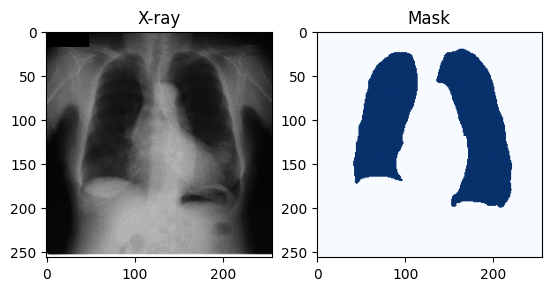

In [ ]:
import os, cv2
import numpy as np
import matplotlib.pyplot as plt

train_img_dir = "/content/drive/MyDrive/Segmentation01/train/org"
train_mask_dir = "/content/drive/MyDrive/Segmentation01/train/label"

img_files = sorted(os.listdir(train_img_dir))
mask_files = sorted(os.listdir(train_mask_dir))

# Check a sample
img = cv2.imread(os.path.join(train_img_dir, img_files[0]), cv2.IMREAD_GRAYSCALE)
mask = cv2.imread(os.path.join(train_mask_dir, mask_files[0]), cv2.IMREAD_GRAYSCALE)

plt.subplot(1,2,1)
plt.imshow(img, cmap='grey')
plt.title("X-ray")
plt.subplot(1,2,2)
plt.imshow(mask, cmap='Blues')
plt.title("Mask")
plt.show()


In [ ]:
print(mask )

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Conv2DTranspose, concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split

In [ ]:
train_img_dir = "/content/drive/MyDrive/Segmentation01/train/org"  # folder with X-ray images
train_mask_dir = "/content/drive/MyDrive/Segmentation01/train/label"  # folder with corresponding masks

BATCH_SIZE = 4
EPOCHS = 30

In [ ]:
import numpy as np
import os
import cv2

IMG_SIZE = 224



# Load images
X = []
Y = []

image_files = sorted(os.listdir(train_img_dir))
mask_files = sorted(os.listdir(train_mask_dir))

# Check file counts
print("Images:", len(image_files))
print("Masks:", len(mask_files))

# Ensure both folders have the same number of files
if len(image_files) != len(mask_files):
    raise ValueError("❌ Mismatch: Number of images and masks not equal!")

for img_name, mask_name in zip(image_files, mask_files):
    img_path = os.path.join(train_img_dir, img_name)
    mask_path = os.path.join(train_mask_dir, mask_name)

    # Load grayscale and resize
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    mask = cv2.resize(mask, (IMG_SIZE, IMG_SIZE))

    # Normalize
    img = img / 255.0
    mask = mask / 255.0
    mask = (mask > 0.5).astype(np.float32)

    # CLAHE for contrast enhancement
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    img = clahe.apply((img * 255).astype('uint8')) / 255.0

    X.append(img)
    Y.append(mask)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
Y = np.array(Y).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

print("✅ Shapes:", X.shape, Y.shape)


Images: 50
Masks: 50
✅ Shapes: (50, 224, 224, 1) (50, 224, 224, 1)


In [ ]:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=42)
print(f"Training: {X_train.shape[0]}, Validation: {X_val.shape[0]}")


Training: 40, Validation: 10


In [ ]:
def dice_bce_loss(y_true, y_pred, smooth=1):
    # BCE loss
    bce = tf.keras.losses.BinaryCrossentropy()(y_true, y_pred)
    # Dice loss
    y_true_f = tf.reshape(y_true, [-1])
    y_pred_f = tf.reshape(y_pred, [-1])
    intersection = tf.reduce_sum(y_true_f * y_pred_f)
    dice_loss = 1 - (2.*intersection + smooth) / (tf.reduce_sum(y_true_f) + tf.reduce_sum(y_pred_f) + smooth)
    return bce + dice_loss

In [ ]:
inputs = Input((IMG_SIZE, IMG_SIZE, 1))

# Encoder
c1 = Conv2D(32, (3,3), activation='relu', padding='same')(inputs)
c1 = Conv2D(32, (3,3), activation='relu', padding='same')(c1)
p1 = MaxPooling2D((2,2))(c1)

c2 = Conv2D(64, (3,3), activation='relu', padding='same')(p1)
c2 = Conv2D(64, (3,3), activation='relu', padding='same')(c2)
p2 = MaxPooling2D((2,2))(c2)

c3 = Conv2D(128, (3,3), activation='relu', padding='same')(p2)
c3 = Conv2D(128, (3,3), activation='relu', padding='same')(c3)

# Decoder
u1 = Conv2DTranspose(64, (2,2), strides=(2,2), padding='same')(c3)
u1 = concatenate([u1, c2])
c4 = Conv2D(64, (3,3), activation='relu', padding='same')(u1)
c4 = Conv2D(64, (3,3), activation='relu', padding='same')(c4)

u2 = Conv2DTranspose(32, (2,2), strides=(2,2), padding='same')(c4)
u2 = concatenate([u2, c1])
c5 = Conv2D(32, (3,3), activation='relu', padding='same')(u2)
c5 = Conv2D(32, (3,3), activation='relu', padding='same')(c5)

outputs = Conv2D(1, (1,1), activation='sigmoid')(c5)

model = Model(inputs, outputs)
model.compile(optimizer='adam', loss=dice_bce_loss, metrics=['accuracy'])
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_72 (Conv2D)  │ (None, 224, 224,  │        320 │ input_layer_3[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_73 (Conv2D)  │ (None, 224, 224,  │      9,248 │ conv2d_72[0][0]   │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_9     │ (None, 112, 112,  │          0 │ conv2d_73[0][0]   │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_74 (Conv2D)  │ (None, 112, 112,  │     18,496 │ max_pooling2d_9[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_75 (Conv2D)  │ (None, 112, 112,  │     36,928 │ conv2d_74[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_10    │ (None, 56, 56,    │          0 │ conv2d_75[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_76 (Conv2D)  │ (None, 56, 56,    │     73,856 │ max_pooling2d_10… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_77 (Conv2D)  │ (None, 56, 56,    │    147,584 │ conv2d_76[0][0]   │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_transpose_9  │ (None, 112, 112,  │     32,832 │ conv2d_77[0][0]   │
│ (Conv2DTranspose)   │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_9       │ (None, 112, 112,  │          0 │ conv2d_transpose… │
│ (Concatenate)       │ 128)              │            │ conv2d_75[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_78 (Conv2D)  │ (None, 112, 112,  │     73,792 │ concatenate_9[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_79 (Conv2D)  │ (None, 112, 112,  │     36,928 │ conv2d_78[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_transpose_10 │ (None, 224, 224,  │      8,224 │ conv2d_79[0][0]   │
│ (Conv2DTranspose)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_10      │ (None, 224, 224,  │          0 │ conv2d_transpose… │
│ (Concatenate)       │ 64)               │            │ conv2d_73[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_80 (Conv2D)  │ (None, 224, 224,  │     18,464 │ concatenate_10[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_81 (Conv2D)  │ (None, 224, 224,  │      9,248 │ conv2d_80[0][0] 

 Total params: 465,953 (1.78 MB)

 Trainable params: 465,953 (1.78 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
def weighted_bce_loss(y_true, y_pred, weight=2.0):
    bce = tf.keras.losses.binary_crossentropy(y_true, y_pred)
    weights = y_true * (weight - 1) + 1
    return tf.reduce_mean(bce * weights)

def combined_loss(y_true, y_pred):
    return dice_bce_loss(y_true, y_pred) + 0.5 * weighted_bce_loss(y_true, y_pred)


In [ ]:
checkpoint = ModelCheckpoint("lung_segmentation_unet.h5", save_best_only=True, monitor='val_loss')
earlystop = EarlyStopping(patience=5, restore_best_weights=True, monitor='val_loss')
reduce_lr = ReduceLROnPlateau(factor=0.5, patience=3, monitor='val_loss')


In [ ]:
 history = model.fit(
    X_train, Y_train,
    validation_data=(X_val, Y_val),
    epochs=20,
    batch_size=BATCH_SIZE,
    callbacks=[checkpoint, earlystop, reduce_lr]
)

Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.5527 - loss: 1.3138

10/10 ━━━━━━━━━━━━━━━━━━━━ 22s 659ms/step - accuracy: 0.5614 - loss: 1.3104 - val_accuracy: 0.6876 - val_loss: 1.1989 - learning_rate: 0.0010
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.7128 - loss: 1.1921

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 0.7123 - loss: 1.1909 - val_accuracy: 0.6876 - val_loss: 1.1427 - learning_rate: 0.0010
Epoch 3/20
 9/10 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.7097 - loss: 1.1146

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.7094 - loss: 1.1061 - val_accuracy: 0.7465 - val_loss: 1.0330 - learning_rate: 0.0010
Epoch 4/20
 9/10 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.7959 - loss: 0.9633

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.8013 - loss: 0.9558 - val_accuracy: 0.8536 - val_loss: 0.7812 - learning_rate: 0.0010
Epoch 5/20
 9/10 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.8620 - loss: 0.7385

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.8621 - loss: 0.7330 - val_accuracy: 0.8973 - val_loss: 0.4694 - learning_rate: 0.0010
Epoch 6/20
 9/10 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9061 - loss: 0.4785

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.9056 - loss: 0.4816 - val_accuracy: 0.9156 - val_loss: 0.4147 - learning_rate: 0.0010
Epoch 7/20
 9/10 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9196 - loss: 0.4057

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.9195 - loss: 0.4068 - val_accuracy: 0.9162 - val_loss: 0.4066 - learning_rate: 0.0010
Epoch 8/20
 9/10 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9200 - loss: 0.3982

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.9213 - loss: 0.3926 - val_accuracy: 0.9401 - val_loss: 0.2842 - learning_rate: 0.0010
Epoch 9/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.9300 - loss: 0.3453 - val_accuracy: 0.9393 - val_loss: 0.2954 - learning_rate: 0.0010
Epoch 10/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.9410 - loss: 0.2936 - val_accuracy: 0.9090 - val_loss: 0.3982 - learning_rate: 0.0010
Epoch 11/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.9289 - loss: 0.3541 - val_accuracy: 0.9273 - val_loss: 0.3629 - learning_rate: 0.0010
Epoch 12/20
 9/10 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9224 - loss: 0.4007

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.9247 - loss: 0.3869 - val_accuracy: 0.9439 - val_loss: 0.2836 - learning_rate: 5.0000e-04
Epoch 13/20
 9/10 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9460 - loss: 0.2743

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.9454 - loss: 0.2763 - val_accuracy: 0.9506 - val_loss: 0.2381 - learning_rate: 5.0000e-04
Epoch 14/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.9440 - loss: 0.2722 - val_accuracy: 0.9482 - val_loss: 0.2611 - learning_rate: 5.0000e-04
Epoch 15/20
 9/10 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9491 - loss: 0.2559

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.9487 - loss: 0.2569 - val_accuracy: 0.9525 - val_loss: 0.2197 - learning_rate: 5.0000e-04
Epoch 16/20
 9/10 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.9510 - loss: 0.2426

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.9508 - loss: 0.2428 - val_accuracy: 0.9558 - val_loss: 0.2110 - learning_rate: 5.0000e-04
Epoch 17/20
 9/10 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9515 - loss: 0.2371

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.9514 - loss: 0.2378 - val_accuracy: 0.9570 - val_loss: 0.2077 - learning_rate: 5.0000e-04
Epoch 18/20
 9/10 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9539 - loss: 0.2195

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.9537 - loss: 0.2215 - val_accuracy: 0.9582 - val_loss: 0.1935 - learning_rate: 5.0000e-04
Epoch 19/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.9532 - loss: 0.2234 - val_accuracy: 0.9480 - val_loss: 0.2278 - learning_rate: 5.0000e-04
Epoch 20/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.9501 - loss: 0.2372 - val_accuracy: 0.9540 - val_loss: 0.2046 - learning_rate: 5.0000e-04


In [ ]:
import tensorflow as tf

def dice_loss(y_true, y_pred, smooth=1):
    y_true_f = tf.reshape(y_true, [-1])
    y_pred_f = tf.reshape(y_pred, [-1])
    intersection = tf.reduce_sum(y_true_f * y_pred_f)
    return 1 - ((2. * intersection + smooth) /
                (tf.reduce_sum(y_true_f) + tf.reduce_sum(y_pred_f) + smooth))

def dice_bce_loss(y_true, y_pred, smooth=1):
    bce = tf.keras.losses.BinaryCrossentropy()(y_true, y_pred)
    y_true_f = tf.reshape(y_true, [-1])
    y_pred_f = tf.reshape(y_pred, [-1])
    intersection = tf.reduce_sum(y_true_f * y_pred_f)
    dice_loss_val = 1 - (2.*intersection + smooth) / (tf.reduce_sum(y_true_f) + tf.reduce_sum(y_pred_f) + smooth)
    return bce + dice_loss_val


In [ ]:
from keras.models import load_model

In [ ]:
from tensorflow.keras.models import load_model

best_model = load_model(
    "lung_segmentation_unet.h5",
    custom_objects={'dice_loss': dice_loss, 'dice_bce_loss': dice_bce_loss}
)

In [ ]:
IMG_SIZE = 224

In [ ]:
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


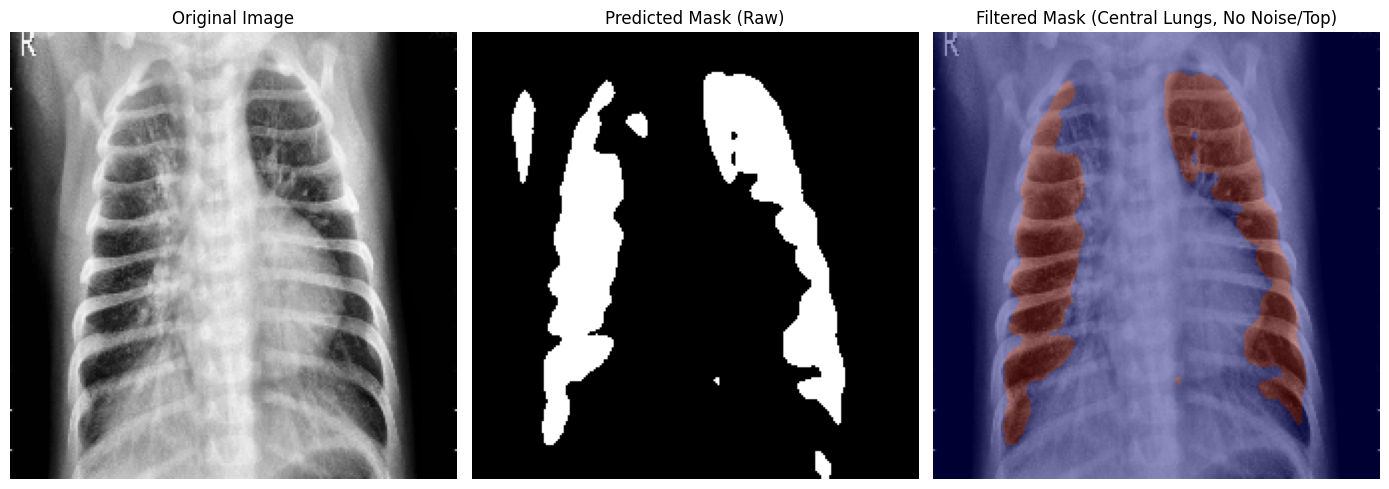

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

test_path = "/content/drive/MyDrive/chest_xray/test/PNEUMONIA/BACTERIA-4167818-0002.jpeg"
IMG_SIZE = 224

# --- Load and preprocess ---
test_img = cv2.imread(test_path, cv2.IMREAD_GRAYSCALE)
test_img = cv2.resize(test_img, (IMG_SIZE, IMG_SIZE))

# CLAHE enhancement (same as training)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
test_img = clahe.apply(test_img)

# Normalize and prepare input
test_input = np.expand_dims(test_img, axis=(0, -1)) / 255.0

# --- Predict mask ---
pred_mask = best_model.predict(test_input)[0]
binary_mask = (pred_mask > 0.5).astype(np.uint8).squeeze()

# --- Find connected components ---
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(binary_mask, connectivity=8)

# Initialize filtered mask
filtered_mask = np.zeros_like(binary_mask)
h, w = binary_mask.shape

# Reduce top exclusion (from 25% → 15%)
y_top_limit = int(0.15 * h)
x_left_limit = int(0.20 * w)
x_right_limit = int(0.80 * w)

for i in range(1, num_labels):
    x, y, bw, bh, area = stats[i]
    cx, cy = centroids[i]
    aspect_ratio = bw / float(bh + 1e-5)

    # Distance from image center (to protect central patches)
    dist_from_center = abs(cx - w / 2)

    # --- Filter logic ---
    # 1️⃣ Ignore very horizontal blobs
    # 2️⃣ Ignore blobs too high
    # 3️⃣ Ignore blobs outside horizontal center (except small ones near center)
    # 4️⃣ Keep small patches only if near center
    if aspect_ratio <= 2.0 and cy > y_top_limit:
        if (x_left_limit < cx < x_right_limit) or (dist_from_center < w * 0.1):
            if area > 100 or dist_from_center < w * 0.1:
                filtered_mask[labels == i] = 1

# --- Visualization ---
plt.figure(figsize=(14, 6))

plt.subplot(1, 3, 1)
plt.imshow(test_img, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(binary_mask, cmap='gray')
plt.title("Predicted Mask (Raw)")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(test_img, cmap='gray')
plt.imshow(filtered_mask, cmap='jet', alpha=0.4)
plt.title("Filtered Mask (Central Lungs, No Noise/Top)")
plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
######################

In [ ]:
#####################

In [ ]:
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt



In [ ]:
######################

In [ ]:
clf_model = load_model(
    "pneumonic_detection_m0del.h5",

)

print("✅ clf model loaded successfully!")

✅ clf model loaded successfully!


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import load_model

# ---------------------------------------------------
# 1️⃣ Define custom loss functions (for loading UNet)
# ---------------------------------------------------
def dice_loss(y_true, y_pred, smooth=1):
    y_true_f = tf.reshape(y_true, [-1])
    y_pred_f = tf.reshape(y_pred, [-1])
    intersection = tf.reduce_sum(y_true_f * y_pred_f)
    return 1 - (2. * intersection + smooth) / (
        tf.reduce_sum(y_true_f) + tf.reduce_sum(y_pred_f) + smooth
    )

def dice_bce_loss(y_true, y_pred, smooth=1):
    bce = tf.keras.losses.BinaryCrossentropy()(y_true, y_pred)
    y_true_f = tf.reshape(y_true, [-1])
    y_pred_f = tf.reshape(y_pred, [-1])
    intersection = tf.reduce_sum(y_true_f * y_pred_f)
    dice = 1 - (2. * intersection + smooth) / (
        tf.reduce_sum(y_true_f) + tf.reduce_sum(y_pred_f) + smooth
    )
    return bce + dice


# ---------------------------------------------------
# 2️⃣ Load trained UNet model
# ---------------------------------------------------
unet = load_model(
    "/content/lung_segmentation_unet.h5",
    custom_objects={'dice_loss': dice_loss, 'dice_bce_loss': dice_bce_loss}
)
print("✅ UNet model loaded successfully!")


✅ UNet model loaded successfully!


In [ ]:
# 3️⃣ Filtered lung mask generator
# ---------------------------------------------------
def get_filtered_lung_mask(test_path, model, IMG_SIZE=224):
    test_img = cv2.imread(test_path, cv2.IMREAD_GRAYSCALE)
    test_img = cv2.resize(test_img, (IMG_SIZE, IMG_SIZE))

    # CLAHE enhancement
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    test_img = clahe.apply(test_img)

    # Normalize and predict
    test_input = np.expand_dims(test_img, axis=(0, -1)) / 255.0
    pred_mask = model.predict(test_input)[0]
    binary_mask = (pred_mask > 0.5).astype(np.uint8).squeeze()

    # Connected component filtering
    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(binary_mask, connectivity=8)
    filtered_mask = np.zeros_like(binary_mask)
    h, w = binary_mask.shape

    # Define filtering boundaries
    y_top_limit = int(0.15 * h)
    y_bottom_limit = int(0.95 * h)
    x_left_limit = int(0.20 * w)
    x_right_limit = int(0.80 * w)
    center_x = w // 2

    for i in range(1, num_labels):
        x, y, bw, bh, area = stats[i]
        cx, cy = centroids[i]
        aspect_ratio = bw / float(bh + 1e-5)
        dist_from_center = abs(cx - center_x)

        near_corner = (cy < 0.25 * h) and ((cx < 0.25 * w) or (cx > 0.75 * w))
        too_top = cy < y_top_limit
        too_bottom = cy > y_bottom_limit
        too_horizontal = aspect_ratio > 2.0
        large_corner_blob = near_corner and area > 300

        # Keep only blobs that are roughly central
        if not (too_horizontal or too_top or too_bottom or large_corner_blob):
            if (x_left_limit < cx < x_right_limit) or (dist_from_center < w * 0.1):
                if area > 80 or dist_from_center < w * 0.1:
                    filtered_mask[labels == i] = 1

    return test_img, filtered_mask

In [ ]:
# --------------------------
def get_gradcam(model, img, layer_name):
    grad_model = tf.keras.models.Model(
        [model.input],
        [model.get_layer(layer_name).output, model.output]
    )
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img)
        # use the predicted class for loss
        pred_class = tf.argmax(predictions[0])
        loss = predictions[:, pred_class]
    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0,1,2))
    heatmap = tf.reduce_mean(tf.multiply(pooled_grads, conv_outputs), axis=-1).numpy()[0]
    heatmap = np.maximum(heatmap, 0)
    heatmap /= np.max(heatmap) + 1e-8  # avoid division by 0
    return cv2.resize(heatmap, (img.shape[2], img.shape[1]))

# --------------------------
# 2️⃣ Restrict Grad-CAM to lung mask
# --------------------------
def restrict_to_lungs(img_unet, unet_model, heatmap):
    lung_mask = unet_model.predict(img_unet)[0,:,:,0]
    lung_mask = (lung_mask > 0.5).astype(np.uint8)
    heatmap_lung = heatmap * lung_mask
    return heatmap_lung, lung_mask

# --------------------------
# 3️⃣ Convert Grad-CAM to lesion mask
# --------------------------
def gradcam_to_mask(heatmap, threshold=None):
    if threshold is None:
        threshold = 0.2 * np.max(heatmap)  # adaptive threshold
    lesion_mask = (heatmap > threshold).astype(np.uint8)
    # keep only the largest connected region
    num_labels, labels, stats, _ = cv2.connectedComponentsWithStats(lesion_mask)
    if num_labels > 1:
        areas = stats[1:, cv2.CC_STAT_AREA]
        largest = np.argmax(areas) + 1
        lesion_mask = np.where(labels == largest, 1, 0).astype(np.uint8)
    return lesion_mask

In [ ]:
# 4️⃣ Grad-CAM & Severity Analysis Pipeline
# ---------------------------------------------------
def full_gradcam_analysis(img_path, clf_model, unet, layer_name="block5_conv3", IMG_SIZE=224):
    # --- Step 1: Preprocess image for classifier ---
    img_gray = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img_resized = cv2.resize(img_gray, (IMG_SIZE, IMG_SIZE))

    img_rgb = np.stack((img_resized,) * 3, axis=-1)
    img_input = np.expand_dims(img_rgb, axis=0) / 255.0

    # --- Step 2: Classification ---
    pred_prob = clf_model.predict(img_input)[0][0]
    pred_class = 1 if pred_prob >= 0.5 else 0

    if pred_class == 0:
        print(" Result: NORMAL")
        return

    print(" Result: PNEUMONIA detected")

    # --- Step 3: Get filtered lung mask ---
    _, lung_mask = get_filtered_lung_mask(img_path, unet, IMG_SIZE)

    # --- Step 4: Grad-CAM ---
    heatmap = get_gradcam(clf_model, img_input, layer_name)
    lung_mask = cv2.resize(lung_mask, (IMG_SIZE, IMG_SIZE))

    # Restrict Grad-CAM to lungs only
    heatmap_lung = heatmap * lung_mask
    lesion_mask = gradcam_to_mask(heatmap_lung)

    # --- Step 5: Visualization ---
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.imshow(img_resized, cmap='gray')
    plt.title("Original X-ray")
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(lung_mask, cmap='Blues')
    plt.title(" Lung Mask")
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(img_resized, cmap='gray')
    plt.imshow(lesion_mask, cmap='Reds', alpha=0.5)
    plt.title("Lesion Region (Grad-CAM)")
    plt.axis('off')

    plt.tight_layout()
    plt.show()

    # --- Step 6: Severity Calculation ---
    lung_area = np.sum(lung_mask)
    lesion_area = np.sum(lesion_mask)
    severity = lesion_area / lung_area if lung_area > 0 else 0

    print(f"Lung area: {lung_area}, Lesion area: {lesion_area}")
    print(f" Estimated Severity: {severity * 100:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
⚠️ Result: PNEUMONIA detected
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


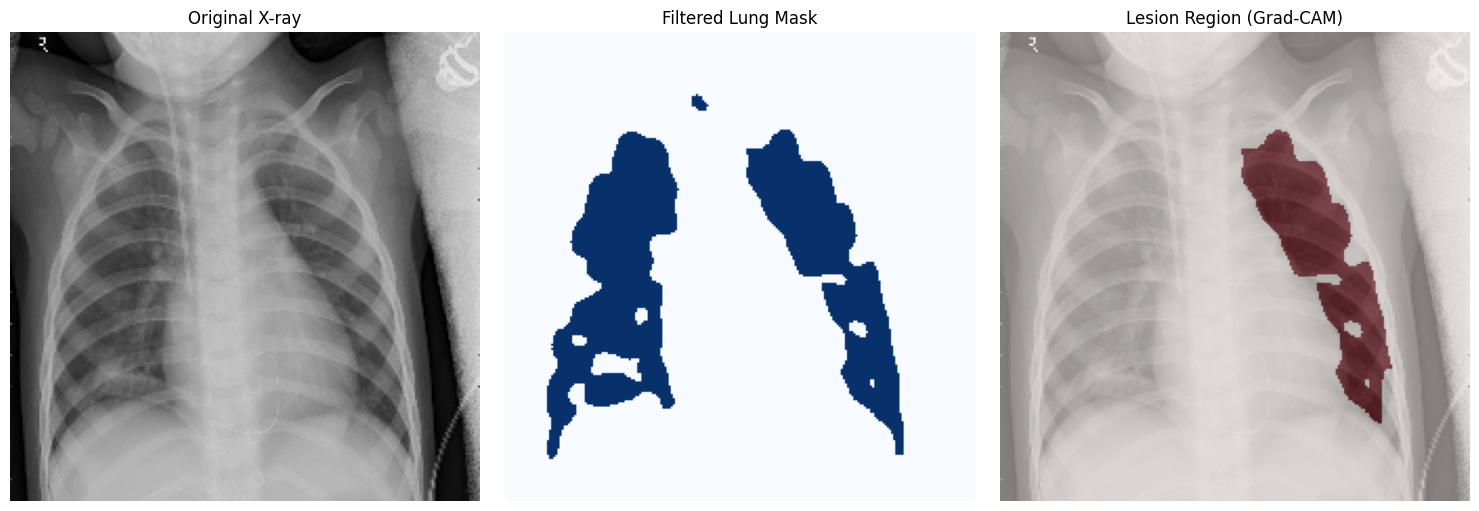

Lung area: 9025, Lesion area: 3650
🩸 Estimated Severity: 40.44%


In [ ]:
#  Example Usage
# ---------------------------------------------------
img_path = "/content/drive/MyDrive/chest_xray/test/PNEUMONIA/BACTERIA-1514320-0002.jpeg"
full_gradcam_analysis(img_path, clf_model, unet)